In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv("/content/coke.csv")
data.head()

Date      Open      High       Low     Close   Volume  Dividends  \
0  1962-01-02  0.051133  0.052525  0.051133  0.051133   806400        0.0   
1  1962-01-03  0.050374  0.050374  0.049234  0.049994  1574400        0.0   
2  1962-01-04  0.050121  0.050753  0.050121  0.050374   844800        0.0   
3  1962-01-05  0.050374  0.051006  0.049108  0.049234  1420800        0.0   
4  1962-01-08  0.048855  0.048855  0.047779  0.048728  2035200        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [5]:
data.columns = data.columns.str.lower()
data.head()

date      open      high       low     close   volume  dividends  \
0  1962-01-02  0.051133  0.052525  0.051133  0.051133   806400        0.0   
1  1962-01-03  0.050374  0.050374  0.049234  0.049994  1574400        0.0   
2  1962-01-04  0.050121  0.050753  0.050121  0.050374   844800        0.0   
3  1962-01-05  0.050374  0.051006  0.049108  0.049234  1420800        0.0   
4  1962-01-08  0.048855  0.048855  0.047779  0.048728  2035200        0.0   

   stock splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

#전체변수 시각화

In [6]:
data = data.set_index("date")
data.head()

open      high       low     close   volume  dividends  \
date                                                                     
1962-01-02  0.051133  0.052525  0.051133  0.051133   806400        0.0   
1962-01-03  0.050374  0.050374  0.049234  0.049994  1574400        0.0   
1962-01-04  0.050121  0.050753  0.050121  0.050374   844800        0.0   
1962-01-05  0.050374  0.051006  0.049108  0.049234  1420800        0.0   
1962-01-08  0.048855  0.048855  0.047779  0.048728  2035200        0.0   

            stock splits  
date                      
1962-01-02           0.0  
1962-01-03           0.0  
1962-01-04           0.0  
1962-01-05           0.0  
1962-01-08           0.0

<Figure size 1440x720 with 0 Axes>

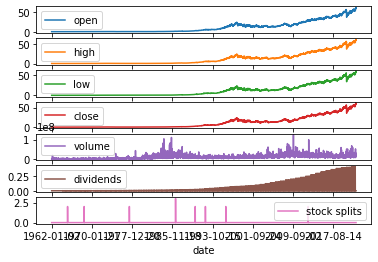

In [9]:
plt.figure(figsize=(20, 10))
data.plot(subplots=True);

- 전체 주가 자체는 증가하는 모양

#개별변수 시각화(open, high, low, close)

In [15]:
fig = make_subplots(rows=4, cols=1, subplot_titles=["open", "high", "low", "close"])
fig.add_trace(go.Line(x=data.index, y=data["open"], name="open"), row=1, col=1)
fig.add_trace(go.Line(x=data.index, y=data["high"], name="high"), row=2, col=1)
fig.add_trace(go.Line(x=data.index, y=data["low"], name="low"), row=3, col=1)
fig.add_trace(go.Line(x=data.index, y=data["volume"], name="volume"), row=4, col=1)
fig.update_layout(title="Cock Stock")
fig.show()

/usr/local/lib/python3.8/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [20]:
px.line(data["close"], title="close Stock")

In [21]:
px.line(data[["close", "open"]])

##이동평균 그래프로 추이확인(300일, 700일, 1200일, 1500일)

In [25]:
madf = data[["close"]]
madays = [300, 700, 1200, 1500]
for day in madays:
  colName = f"ma_{day}"
  madf[colName] = madf["close"].rolling(day).mean()
madf.head()

<ipython-input-25-4e6df8d3f35e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



close  ma_300  ma_700  ma_1200  ma_1500
date                                                  
1962-01-02  0.051133     NaN     NaN      NaN      NaN
1962-01-03  0.049994     NaN     NaN      NaN      NaN
1962-01-04  0.050374     NaN     NaN      NaN      NaN
1962-01-05  0.049234     NaN     NaN      NaN      NaN
1962-01-08  0.048728     NaN     NaN      NaN      NaN

In [26]:
px.line(madf, title="Close MA")

Output hidden; open in https://colab.research.google.com to view.

#지수이동평균 확인(ema, macd, signal)

In [28]:
madf["ema12"] = madf["close"].ewm(12).mean() #단기지수이동
madf["ema26"] = madf["close"].ewm(26).mean() #장기지수이동
madf["MACD"] = madf["ema12"] - madf["ema26"] #이동평균수렴확산
madf["signal"] = madf["MACD"].ewm(9).mean() #macd지수이동평균

<ipython-input-28-f8970cb623df>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
madf.head()

close  ma_300  ma_700  ma_1200  ma_1500     ema12     ema26  \
date                                                                         
1962-01-02  0.051133     NaN     NaN      NaN      NaN  0.051133  0.051133   
1962-01-03  0.049994     NaN     NaN      NaN      NaN  0.050541  0.050553   
1962-01-04  0.050374     NaN     NaN      NaN      NaN  0.050480  0.050491   
1962-01-05  0.049234     NaN     NaN      NaN      NaN  0.050131  0.050159   
1962-01-08  0.048728     NaN     NaN      NaN      NaN  0.049804  0.049851   

                MACD    signal  
date                            
1962-01-02  0.000000  0.000000  
1962-01-03 -0.000012 -0.000006  
1962-01-04 -0.000010 -0.000008  
1962-01-05 -0.000028 -0.000014  
1962-01-08 -0.000047 -0.000022

In [36]:
fig=go.Figure()
fig.add_trace(go.Line(x=madf.index, y=madf["close"], name="close"))
fig.add_trace(go.Line(x=madf.index, y=madf["ema12"], name="ema12"))
fig.add_trace(go.Line(x=madf.index, y=madf["ema26"], name="ema26"))
fig.update_layout(title="ema12, ema26")
fig.show()

/usr/local/lib/python3.8/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [35]:
fig = go.Figure()
fig.add_trace(go.Line(x=madf.index, y=madf["MACD"], name="MACD"))
fig.add_trace(go.Line(x=madf.index, y=madf["signal"], name="signal"))
fig.update_layout(title="MACD, Sinal")
fig.show()

/usr/local/lib/python3.8/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




#일일수익률확인

In [37]:
pctdf = data[["close"]]
pctdf.head()

close
date                
1962-01-02  0.051133
1962-01-03  0.049994
1962-01-04  0.050374
1962-01-05  0.049234
1962-01-08  0.048728

In [39]:
pctdf["pctchange"] = pctdf.pct_change(1)
pctdf.head()

<ipython-input-39-26047c767959>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



close  pctchange
date                           
1962-01-02  0.051133        NaN
1962-01-03  0.049994  -0.022279
1962-01-04  0.050374   0.007598
1962-01-05  0.049234  -0.022615
1962-01-08  0.048728  -0.010282

In [40]:
px.line(pctdf["pctchange"], title="Percent Change of 1days")

In [42]:
px.histogram(pctdf["pctchange"], title="Percent Change Histogram")

#분석시작

##스케일링

In [49]:
df = data[["close"]]
df.head()

close
date                
1962-01-02  0.051133
1962-01-03  0.049994
1962-01-04  0.050374
1962-01-05  0.049234
1962-01-08  0.048728

In [50]:
mms = MinMaxScaler()
dfarr = mms.fit_transform(df)
dfarr

array([[2.16421843e-04],
       [1.97853363e-04],
       [2.04044718e-04],
       ...,
       [9.76691926e-01],
       [9.74410027e-01],
       [9.70824151e-01]])

In [121]:
X = []
y = []
for i in range(60, len(dfarr)):
  timeStep = dfarr[i-60:i,0]
  target = dfarr[i,0]
  X.append(timeStep)
  y.append(target)
print(f"dfarr shape: {dfarr.shape}")
print(f"X length: {len(X)}")
print(f"y shsape: {len(y)}")

dfarr shape: (15122, 1)
X length: 15062
y shsape: 15062


In [122]:
sepsize = int(np.ceil(len(X)*.85))
x_train, x_test = np.array(X[:sepsize]), np.array(X[sepsize:])
y_train, y_test = np.array(y[:sepsize]), y[sepsize:]
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(y_test[:5])

x_train shape: (12803, 60)
x_test shape: (2259, 60)
[0.47606504206252015, 0.4743498872749159, 0.4723896304328351, 0.4595262493226691, 0.45523848670782113]


#모델생성

In [123]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [124]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

model = Sequential()
model.add(LSTM(256, input_shape=(60, 1), return_sequences=True))
model.add(LSTM(128, activation="relu", return_sequences=False))
model.add(Dense(64, activation="relu"))
model.add(Dense(32))
model.add(Dense(1))

es = EarlyStopping(monitor="val_loss", patience=5)

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])
print(model.summary())
history = model.fit(x_train, y_train, epochs=10, validation_split=0.3, callbacks=[es])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 60, 256)           264192    
                                                                 
 lstm_19 (LSTM)              (None, 128)               197120    
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 471,681
Trainable params: 471,681
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
281/281 [=======================

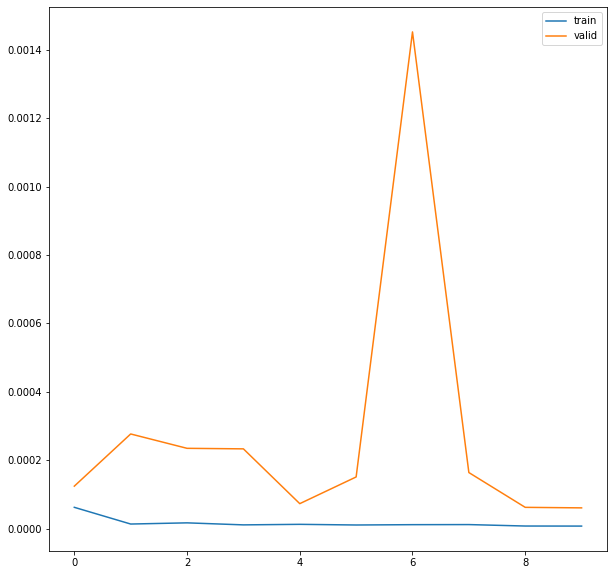

In [119]:
loSs = history.history["loss"]
valLoss = history.history["val_loss"]
mSe = history.history["mse"]
valMse = history.history["val_mse"]

epochs = np.arange(len(loSs))
fig = plt.figure(figsize=(10, 10))
plt.plot(epochs, loSs, label="train")
plt.plot(epochs, valLoss, label="valid")
plt.legend()
plt.show()

- loss와 val_loss의 history plot 결과: 과적합
- 튜닝 및 모델의 수정이 필요

In [154]:
inytest = mms.inverse_transform(np.array(y_test).reshape(-1,1))
inpred = mms.inverse_transform(pred)

print("mean_sqared_error:", mean_squared_error(inytest, inpred))

traindf = df[:sepsize]
testdf = df[sepsize:len(df)-60]
testdf["pred"] = inpred
testdf.head()

mean_sqared_error: 0.9150578491163183


<ipython-input-154-91c28d0cb326>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



close       pred
date                            
2012-11-09  27.090349  28.469284
2012-11-12  26.933582  28.647785
2012-11-13  26.993301  28.824909
2012-11-14  26.881332  28.966825
2012-11-15  27.194859  28.980549

In [153]:
fig=go.Figure()
fig.add_trace(go.Line(x=traindf.index, y=traindf["close"], name='train'))
fig.add_trace(go.Line(x=testdf.index, y=testdf["close"], name="test"))
fig.add_trace(go.Line(x=testdf.index, y=testdf["pred"], name="pred"))
fig.show()

/usr/local/lib/python3.8/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


